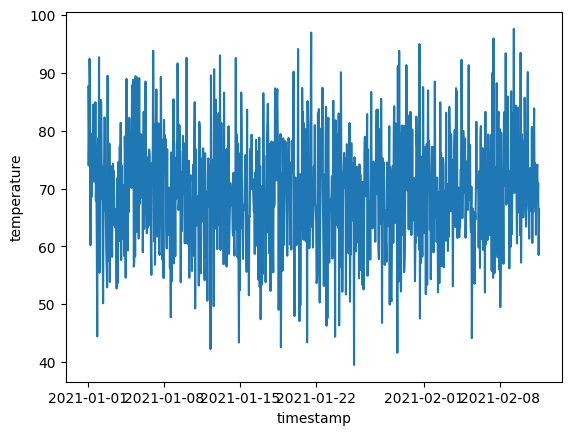

RMSE: 0.33427608349985194


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Generate Synthetic Sensor Data
np.random.seed(0)
n_records = 1000
timestamps = pd.date_range(start='2021-01-01', periods=n_records, freq='H')
temperature = np.random.normal(70, 10, n_records)
pressure = np.random.normal(1, 0.1, n_records)
humidity = np.random.normal(50, 10, n_records)
equipment_id = np.random.choice(range(1, 6), n_records)

sensor_data = pd.DataFrame({
    'timestamp': timestamps,
    'temperature': temperature,
    'pressure': pressure,
    'humidity': humidity,
    'equipment_id': equipment_id
})

# Generate Synthetic Maintenance Logs
failure_prob = 0.1
failure = np.random.choice([0, 1], n_records, p=[1 - failure_prob, failure_prob])
last_maintenance = pd.date_range(start='2020-01-01', periods=n_records, freq='W')

maintenance_logs = pd.DataFrame({
    'timestamp': timestamps,
    'equipment_id': equipment_id,
    'last_maintenance': last_maintenance,
    'failure': failure
})

# Data Cleaning
# For demonstration purposes, the synthetic data is already clean

# Exploratory Data Analysis (EDA)
sns.lineplot(x='timestamp', y='temperature', data=sensor_data)
plt.show()

# Feature Engineering
merged_data = pd.merge(sensor_data, maintenance_logs, on=['timestamp', 'equipment_id'])
merged_data['time_since_last_maintenance'] = (merged_data['timestamp'] - merged_data['last_maintenance']).dt.total_seconds() // 3600

# Model Building
X = merged_data[['temperature', 'pressure', 'humidity', 'time_since_last_maintenance']]
y = merged_data['failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
